In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df=pd.read_csv('/content/drive/MyDrive/AI in Healthcare/Heartds.csv')

In [82]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             29 non-null     int64  
 1   age              29 non-null     int64  
 2   education        29 non-null     int64  
 3   currentSmoker    29 non-null     int64  
 4   cigsPerDay       29 non-null     int64  
 5   BPMeds           29 non-null     int64  
 6   prevalentStroke  29 non-null     int64  
 7   prevalentHyp     29 non-null     int64  
 8   diabetes         29 non-null     int64  
 9   totChol          29 non-null     int64  
 10  sysBP            29 non-null     float64
 11  diaBP            29 non-null     float64
 12  BMI              29 non-null     float64
 13  heartRate        29 non-null     int64  
 14  glucose          29 non-null     int64  
 15  TenYearCHD       29 non-null     int64  
dtypes: float64(3), int64(13)
memory usage: 3.8 KB


In [84]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.413793,46.517241,2.206897,0.586207,13.482759,0.034483,0.0,0.379310,0.0,246.896552,131.913793,85.396552,26.384483,76.172414,78.655172,0.206897
std,0.501230,7.476729,1.013456,0.501230,13.471188,0.185695,0.0,0.493804,0.0,38.051042,20.502208,12.507412,3.697050,10.344319,12.148709,0.412251
min,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,190.000000,100.000000,68.000000,21.350000,60.000000,61.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,225.000000,121.000000,78.000000,23.240000,71.000000,70.000000,0.000000
50%,0.000000,46.000000,2.000000,1.000000,15.000000,0.000000,0.0,0.000000,0.0,245.000000,132.000000,85.500000,26.310000,75.000000,77.000000,0.000000
75%,1.000000,50.000000,3.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.0,272.000000,140.000000,90.000000,28.580000,80.000000,85.000000,0.000000
max,1.000000,63.000000,4.000000,1.000000,43.000000,1.000000,0.0,1.000000,0.0,332.000000,182.000000,121.000000,34.170000,98.000000,113.000000,1.000000


In [85]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [86]:
correlation_matrix=df.corr()
correlation_matrix

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.345052,0.176980,0.279412,0.323742,-0.158777,NaN,0.208979,NaN,-0.012656,-0.133683,-0.024261,-0.208607,0.013301,-0.345231,-0.256279
age,-0.345052,1.000000,-0.255006,-0.312519,-0.262836,-0.141923,NaN,0.003002,NaN,0.008606,0.387990,0.172835,0.456933,-0.214072,0.201773,0.427518
education,0.176980,-0.255006,1.000000,0.244863,0.348193,0.150510,NaN,-0.091051,NaN,0.125602,-0.356630,-0.147581,-0.033046,-0.296501,-0.217354,0.150331
currentSmoker,0.279412,-0.312519,0.244863,1.000000,0.855774,-0.224934,NaN,0.079611,NaN,0.081941,-0.314643,-0.132403,-0.673133,0.014251,-0.059460,0.083440
cigsPerDay,0.323742,-0.262836,0.348193,0.855774,1.000000,-0.192493,NaN,0.035916,NaN,0.079877,-0.299781,-0.125919,-0.476817,-0.043163,0.019821,0.058544
BPMeds,-0.158777,-0.141923,0.150510,-0.224934,-0.192493,1.000000,NaN,0.241747,NaN,0.430152,-0.074238,0.040033,0.256234,-0.207724,0.084614,-0.096523
prevalentStroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentHyp,0.208979,0.003002,-0.091051,0.079611,0.035916,0.241747,NaN,1.000000,NaN,0.129512,0.627741,0.726509,0.015859,0.196492,0.147601,0.127042
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totChol,-0.012656,0.008606,0.125602,0.081941,0.079877,0.430152,NaN,0.129512,NaN,1.000000,-0.189449,-0.035931,0.005238,-0.020005,-0.164022,0.060608


<ipython-input-87-43a463b1fbae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_TenYearCHD.index, y=correlation_with_TenYearCHD.values, palette='coolwarm')


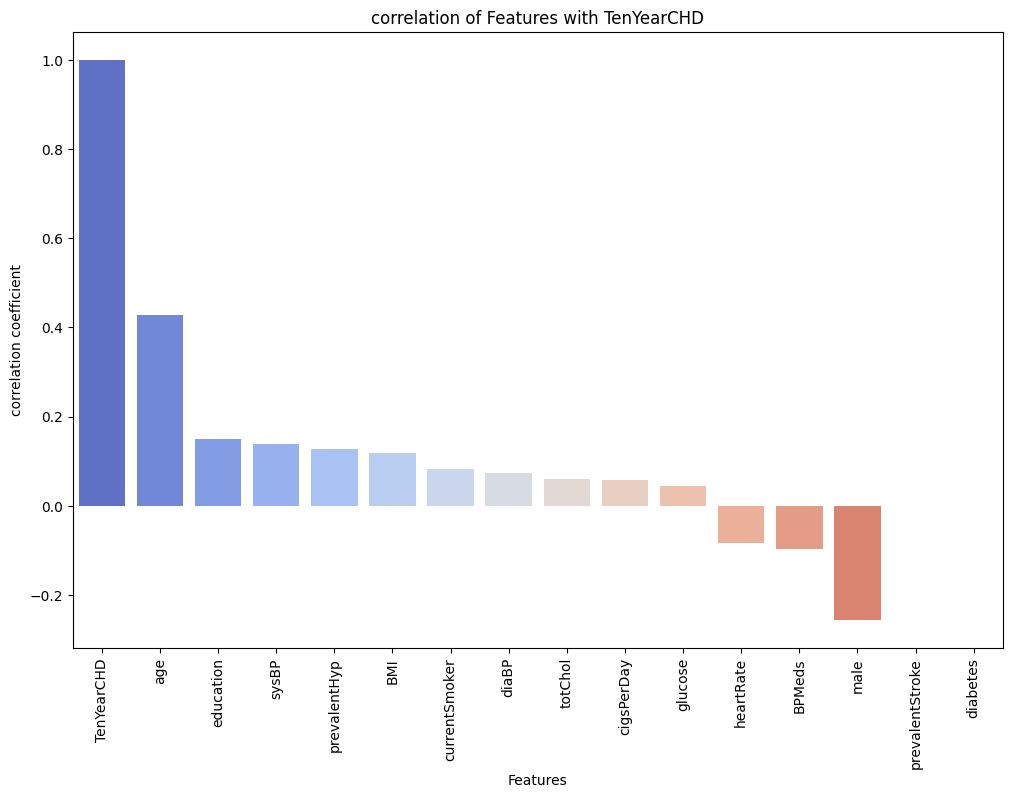

In [87]:
correlation_with_TenYearCHD=correlation_matrix['TenYearCHD'].sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=correlation_with_TenYearCHD.index, y=correlation_with_TenYearCHD.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('correlation of Features with TenYearCHD')
plt.ylabel('correlation coefficient')
plt.xlabel('Features')
plt.show()

In [88]:
high_correlation_features=correlation_with_TenYearCHD[abs(correlation_with_TenYearCHD)>0.1]
print('Highly correlated features:\n',high_correlation_features)

Highly correlated features:
 TenYearCHD      1.000000
age             0.427518
education       0.150331
sysBP           0.137402
prevalentHyp    0.127042
BMI             0.119346
male           -0.256279
Name: TenYearCHD, dtype: float64


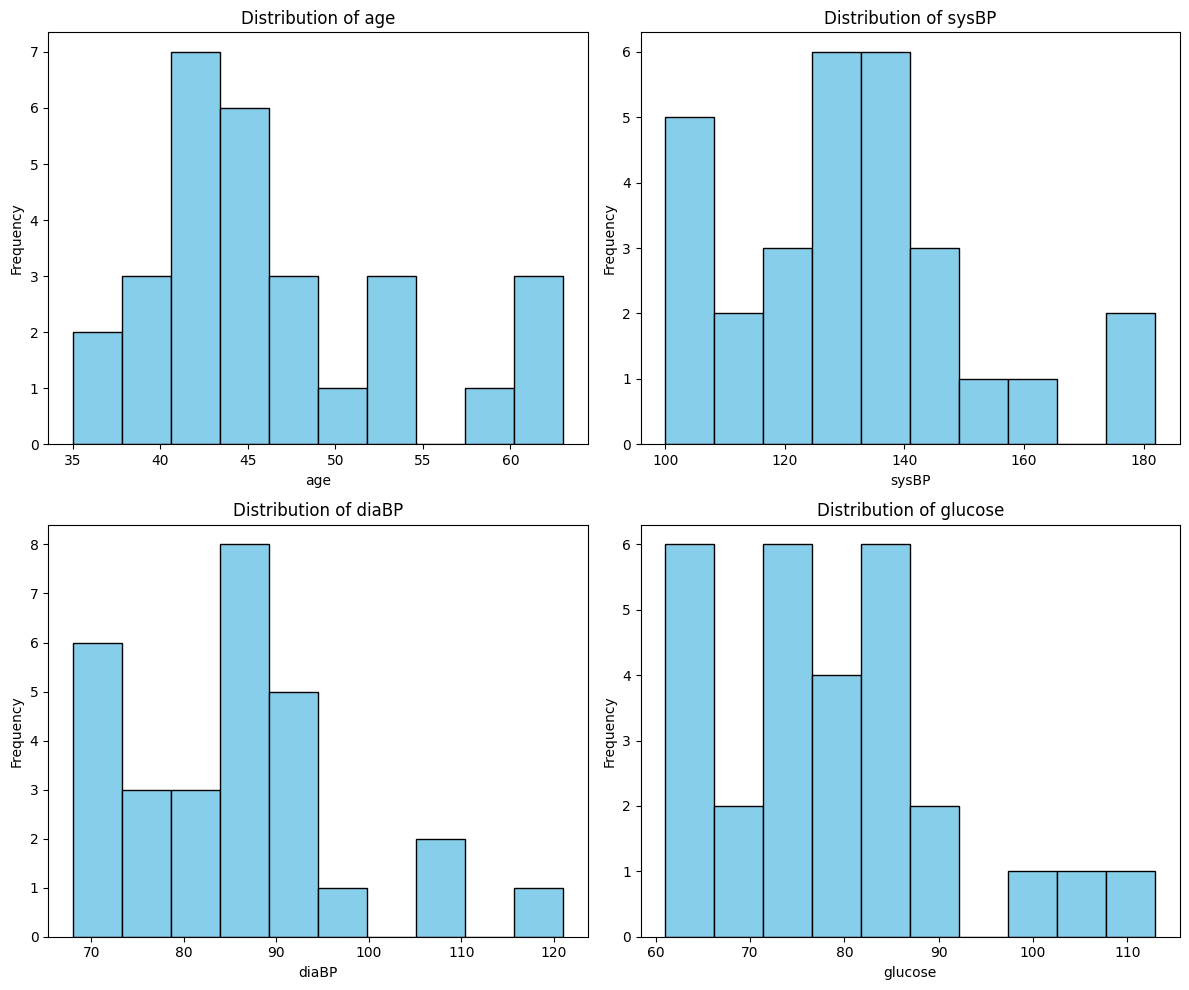

In [89]:
top_4_features=['age','sysBP','diaBP','glucose']
fig,axes=plt.subplots(2,2,figsize=(12,10))
axes=axes.flatten()

for i,feature in enumerate(top_4_features):
  axes[i].hist(df[feature].dropna(),bins=10, color="skyblue", edgecolor="black")
  axes[i].set_title(f'Distribution of {feature}')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [90]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [91]:
x['age_BMI_interaction']=x['age']* x['BMI']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [94]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [95]:
y_pred=model.predict(x_test_scaled)

In [96]:
print(y_pred)  #[ 0.81357427 -0.17947653  0.4419221   0.36682638  0.10137652 -0.19444005]

[ 0.14044262 -0.30870104  1.04588492 -0.37704981  1.54408551 -0.74031437]


In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score,f1_score
y_pred_binary=(y_pred>0.5).astype(int)

accuracy=accuracy_score(y_test, y_pred_binary)
confusion=confusion_matrix(y_test, y_pred_binary)
recall=recall_score(y_test,y_pred_binary)
precision=precision_score(y_test, y_pred_binary)
classification_report=classification_report(y_test, y_pred_binary)
f1=f1_score(y_test, y_pred_binary)

print('Accuracy:',accuracy)
print('confusion Matrix:\n',confusion)
print('Recall:',recall)
print('Precision:',precision)
print('F1 score:',f1)

print('Classification Report:\n', classification_report)


Accuracy: 0.5
confusion Matrix:
 [[3 2]
 [1 0]]
Recall: 0.0
Precision: 0.0
F1 score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6

